## Task 8: Clustering with K-Means – Customer Segmentation

###  Objective
Segment customers into meaningful groups using **K-Means Clustering** based on demographic and spending behavior.

## Downloading dataset from kaggle

In [1]:
import numpy as np

In [2]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mukeshsunku","key":"0ba85e306b541aa18a7549b3a596f382"}'}

In [3]:
# Create the Kaggle folder and move the json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

# Unzip the file
!unzip customer-segmentation-tutorial-in-python.zip

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 6.36MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


## Importing python libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

### Exploring the dataset

In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.shape

(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Encoding the gender columns

In [14]:
# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female=0, Male=1


In [15]:
# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [16]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method to find optimal K

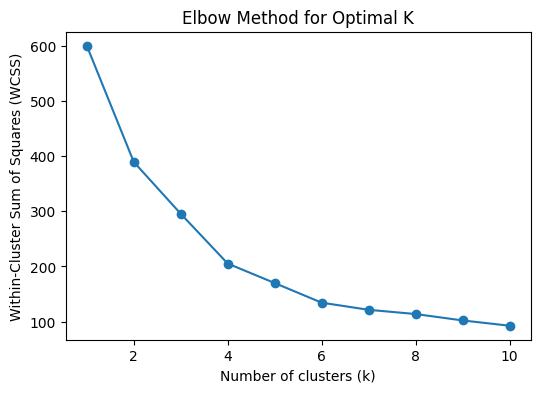

In [17]:
# Use Elbow Method to determine optimal clusters
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()

In [18]:
# Fit final K-Means (say k=5)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


### Visualizing the **clusters**

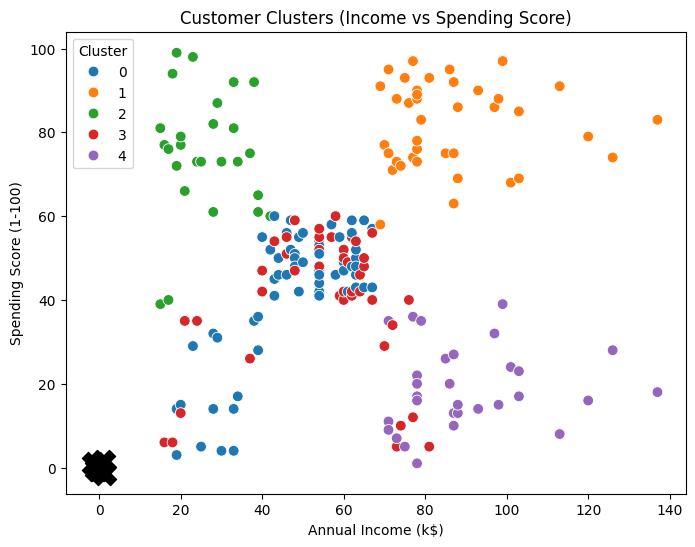

In [19]:
# Visualize clusters in 2D (Annual Income vs Spending Score)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', palette='tab10', data=df, s=60
)
plt.scatter(
    kmeans.cluster_centers_[:, 1],
    kmeans.cluster_centers_[:, 2],
    s=300, color='black', marker='X'
)
plt.title("Customer Clusters (Income vs Spending Score)")
plt.show()

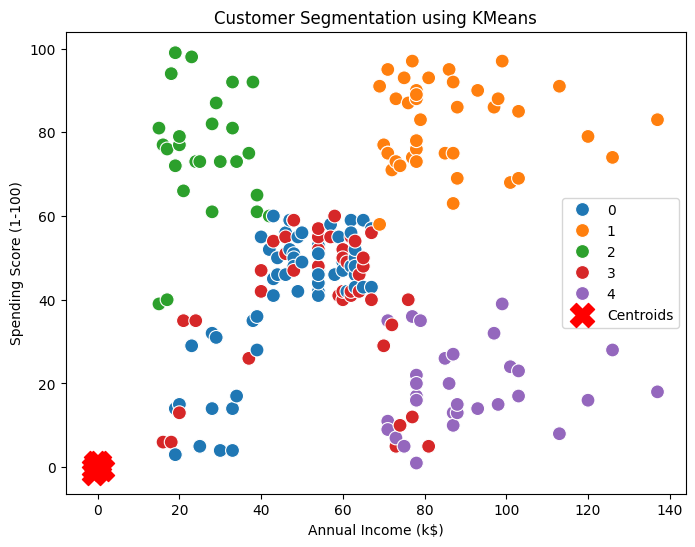

In [20]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    data=df,
    palette="tab10",
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300, c='red', marker='X', label="Centroids"
)
plt.legend()
plt.title("Customer Segmentation using KMeans")
plt.show()

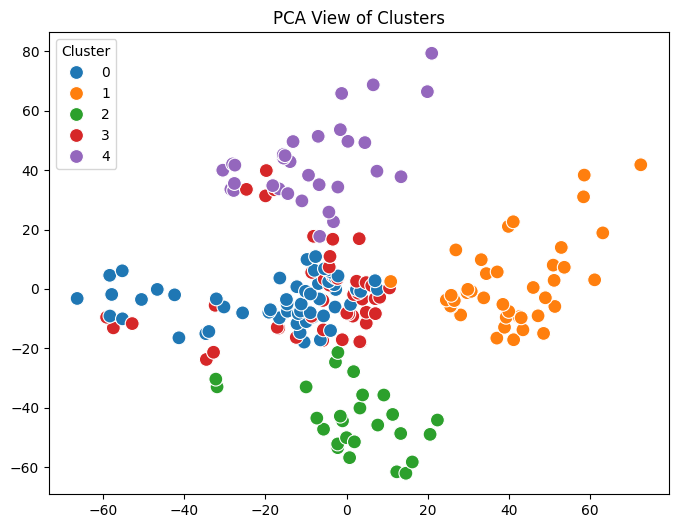

In [24]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# Optional: PCA for Dimensionality Reduction (if >2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="tab10", s=100)
plt.title("PCA View of Clusters")
plt.show()



### Evaluating clustering using Silhouette Score.

In [26]:
# Evaluate Clustering
score = silhouette_score(X, df["Cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.38827725876430913


### a plot of silhouette scores across different values of K (2–10)

In [28]:
# 2. Select relevant features (Annual Income & Spending Score for visualization)
X = df.iloc[:, [3, 4]].values  # Columns: Annual Income, Spending Score

# 3. Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [29]:
# 4. Find optimal K using Silhouette Score
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)


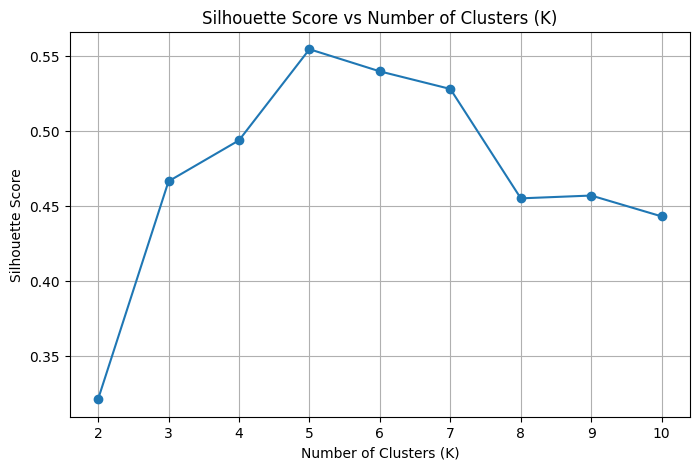

In [30]:
# 5. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [31]:
print("Silhouette Scores for each K:", silhouette_scores)

Silhouette Scores for each K: [np.float64(0.3212707813918878), np.float64(0.46658474419000145), np.float64(0.4939069237513199), np.float64(0.5546571631111091), np.float64(0.5398800926790663), np.float64(0.5281492781108291), np.float64(0.4552147906587443), np.float64(0.4570853966942764), np.float64(0.4431713026508046)]


In [32]:
# Fit KMeans with K=5
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)   # X_scaled = scaled features

# Add cluster labels to the dataset
df_clusters = df.copy()
df_clusters['Cluster'] = clusters


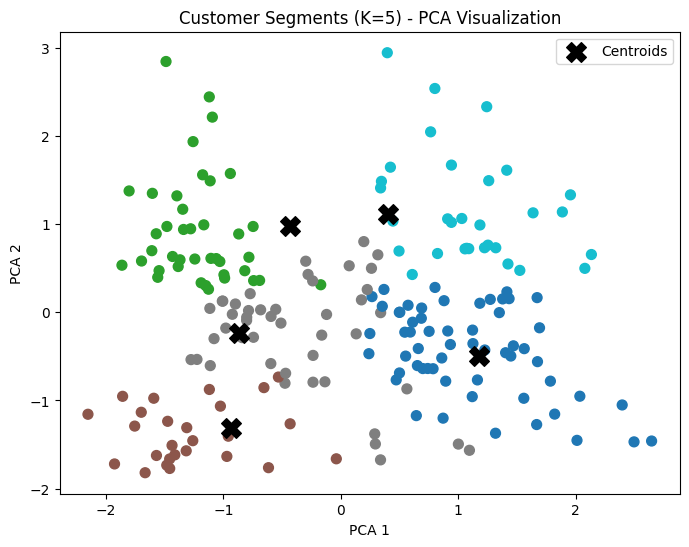

In [33]:
# ==============================
# 1. PCA Visualization (2D)
# ==============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', marker='X', s=200, label='Centroids')
plt.title("Customer Segments (K=5) - PCA Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [34]:

# ==============================
# 2. Cluster Profiles (Centroids)
# ==============================
cluster_profiles = df_clusters.groupby("Cluster").mean()
print("Cluster Profiles (Centroids):\n")
print(cluster_profiles)


Cluster Profiles (Centroids):

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         68.775862  0.431034  55.275862           47.620690   
1        161.025000  0.450000  32.875000           86.100000   
2         23.461538  0.423077  25.769231           26.115385   
3         86.377778  0.400000  26.733333           54.311111   
4        166.870968  0.516129  44.387097           89.774194   

         Spending Score (1-100)  
Cluster                          
0                     41.706897  
1                     81.525000  
2                     74.846154  
3                     40.911111  
4                     18.483871  


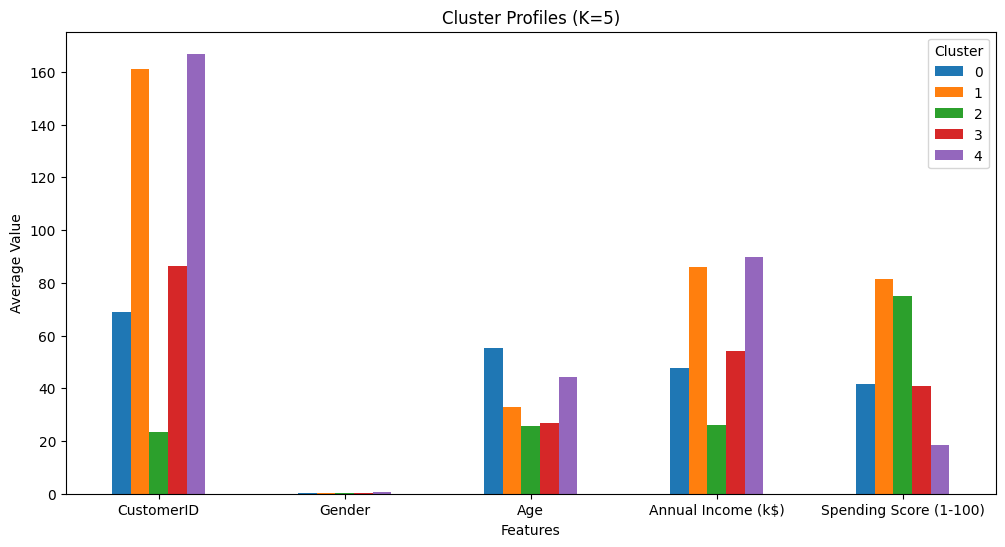

In [35]:
# ==============================
# 3. Bar Plot of Cluster Profiles
# ==============================
cluster_profiles.T.plot(kind='bar', figsize=(12,6))

plt.title("Cluster Profiles (K=5)")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.xticks(rotation=0)
plt.legend(title="Cluster")
plt.show()

### What this shows:

Each bar group = one feature (Age, Income, Spending Score, etc.)

Each color = one cluster (0–4)

You can visually spot differences between clusters.

Example: Cluster 2 might have young customers with high spending,
Cluster 4 might be older customers with low spending, etc.

The bar chart above illustrates the average feature values per cluster:

Cluster 0: Middle-aged customers, moderate income, and moderate spending.

Cluster 1: Relatively younger customers with higher income and higher spending scores → potential premium customers.

Cluster 2: Younger customers with high spending but low income → budget-sensitive spenders.

Cluster 3: Middle-aged customers with average income and moderate spending → balanced customers.

Cluster 4: Older customers with high income but low spending scores → wealthy but conservative spenders.